<a href="https://colab.research.google.com/github/WhiteJaeger/googleColab/blob/master/Lab_2%2C_%D0%9A%D0%B0%D1%89%D0%B8%D1%85%D0%B8%D0%BD_%D0%90%D0%BD%D0%B4%D1%80%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Майнор "Интеллектуальный анализ данных"

# Курс "Прикладные задачи анализа данных"

## Лабораторная работа №2. RecSys

В рамках данной лабораторной работы вам предлагается решить задачу рекомендательной системы на основе следующих данных:

1. **ratings** - рейтинги книг по 10 бальной шкале
* **itmes** - описание items
* **users** - описание user

Скачать данные можно здесь http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Данные

In [0]:
import pandas as pd
import numpy as np
from pathlib import Path

In [23]:
!ls ./drive

'My Drive'


In [0]:
DATA_PATH = Path('./drive/My Drive/Minor/BX-CSV-Dump/')

In [25]:
list(DATA_PATH.glob('*'))

[PosixPath('drive/My Drive/Minor/BX-CSV-Dump/BX-Book-Ratings.csv'),
 PosixPath('drive/My Drive/Minor/BX-CSV-Dump/BX-Users.csv'),
 PosixPath('drive/My Drive/Minor/BX-CSV-Dump/BX-Books.csv')]

In [26]:
ratings = pd.read_csv(DATA_PATH / 'BX-Book-Ratings.csv', sep=';', decimal = ',', 
                      quotechar='"', encoding = 'cp1251', comment = "'")
print(ratings.shape)
ratings.head()

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [27]:
books = pd.read_csv(DATA_PATH / 'BX-Books.csv', sep=';', decimal = ',', error_bad_lines=False,
                      quotechar='"', encoding = 'cp1251', comment = "'")
print(books.shape)
books.head()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


(271360, 8)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [28]:
users = pd.read_csv(DATA_PATH / 'BX-Users.csv', sep=';', quotechar='"', encoding = 'cp1251')
print(users.shape)
users.head()

(278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### ``` Если вычислительные ресурсы не позволяют решить задачу на всех данных, то необходимо это сделать на "сэмпле" данных (выбрав от 5% ids' для user и item). Этот же подход справедлив и для оценки работы алгоритмов```

## Необходимо сделать:

### Задание №1 : Exploratory analysis (2 балла):

* Распределение числа пользователей по количеству взаимодействий
* Разпределение числа "айтемов" по количеству взаимодействий
* Распределение числа рейтингов, средних рейтингов по пользователям, по "айтемам"
* и т.д. (бонус)

#### 1.0 Очистка данных

In [0]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [30]:
# Данные: users, books, ratings

print(f'Users: {len(users)}\nBooks: {len(books)}\nRatings: {len(ratings)}')

Users: 278858
Books: 271360
Ratings: 1149780


##### 1.0.0 Ratings часть датасета

In [31]:
# Посмотрим на каждый из них в отдельности.
# Начнём с ratings.

ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [32]:
print('Types:\n', ratings.dtypes, sep='')

print()

userActivity = ratings.groupby('User-ID').ISBN.count().sort_values(ascending=False)
print('10 users with the highest amount of given ratings: \n')
print(userActivity[:10])

# 13 тысяч оценок. Впечатляет.

Types:
User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

10 users with the highest amount of given ratings: 

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: ISBN, dtype: int64


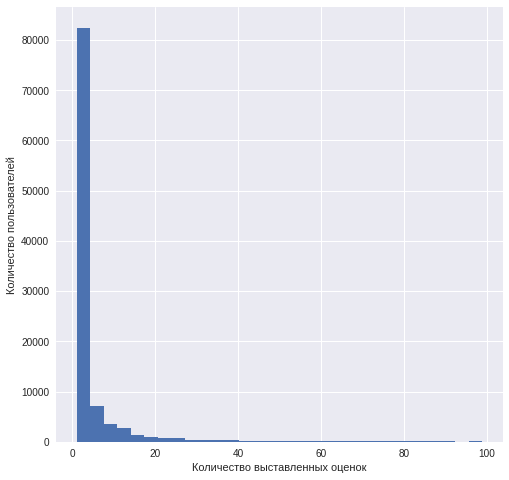

In [33]:
# Их распределение

plt.figure(figsize=(8, 8))
userActivity.where(userActivity<100).hist(bins=30) # Уберём тех, кто поставил больше 100 оценок. Остальных распределим в 30 "корзин".
plt.xlabel('Количество выставленных оценок')
plt.ylabel('Количество пользователей')
plt.show()

# Большинство пользователей ставили от 0 до 2\3 оценок -> пользователи из предыдущего распределения (highest amount of given ratings) - выбросы.

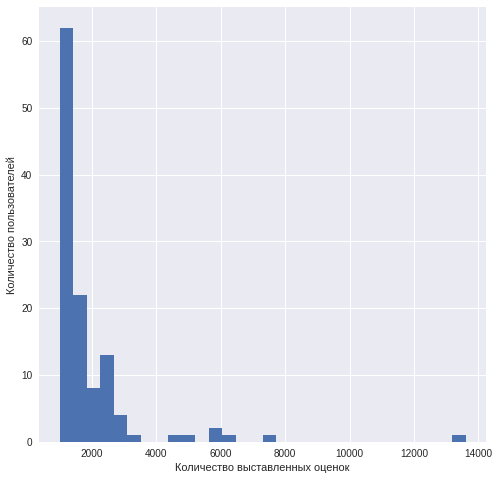

In [34]:
plt.figure(figsize=(8, 8))
userActivity.where(userActivity>1000).hist(bins=30) # Уберём тех, кто поставил меньше 1000 оценок. Остальных - "выбросы" - распределим в 30 "корзин".
plt.xlabel('Количество выставленных оценок')
plt.ylabel('Количество пользователей')
plt.show()

# Всего около 200 человек, большинство из которых поставили в районе 2000 оценок.

### Задание №2 : Оценить разреженность данных по рейтингу (1/2 балла)

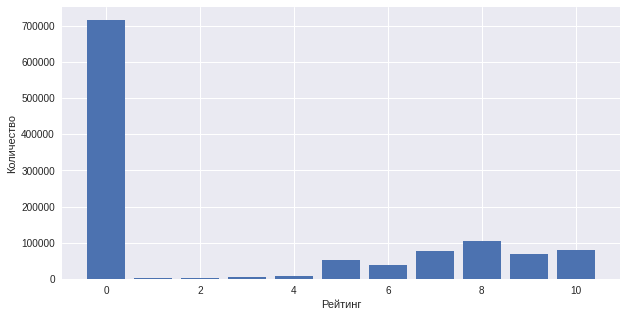

In [35]:
rtg = ratings['Book-Rating'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(rtg.index, rtg.values)
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

Большинство оценок - нули, около 700 тысяч. Относительно много 8 и 10.

Возможно, стоит убрать 0, т.к. они, во-первых, образуют скошенность, во-вторых, это может быть и не 0 на самом деле, а какой-то вид взаимодействия - просто маркирование этого взаимодействия (или, быть может, отсутствия этого взаимодействия).

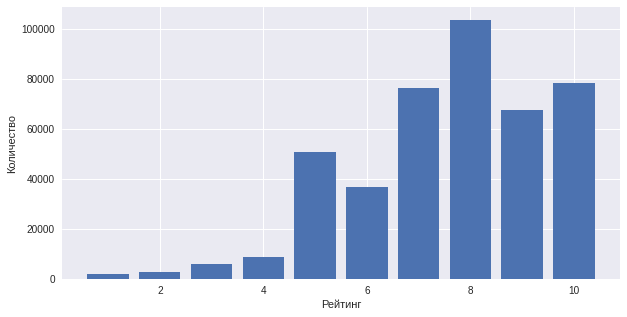

In [36]:
ratings = ratings[ratings['Book-Rating'] != 0]

# Посмотрим на распределение уже без 0.

rtg = ratings['Book-Rating'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(rtg.index, rtg.values)
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

Уже похоже на что-то "нормальное", где довольно много высоких и средних оценок.

In [0]:
ratings.dropna(inplace=True) # Уберём NaN значения

### Продолжение задания №1

##### 1.0.1 Books часть датасета

In [38]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [0]:
# Сразу видно, что можно удалить столбцы со ссылками на картинки

books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], inplace=True)

In [40]:
books.dtypes 

# Год скорее должен быть числом, чем объектом\строкой

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
dtype: object

In [41]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce') # Сконвертируем

# Уберём все вхождения, где год публикации = 0 (чего быть не может) и NaN.

books['Year-Of-Publication'].replace(0, np.nan, inplace=True)

print(f'Original size: {books.shape}')

books.dropna(inplace=True) # И уберём их.

print(f'After NaN cleaning: {books.shape}')

Original size: (271360, 5)
After NaN cleaning: (266636, 5)


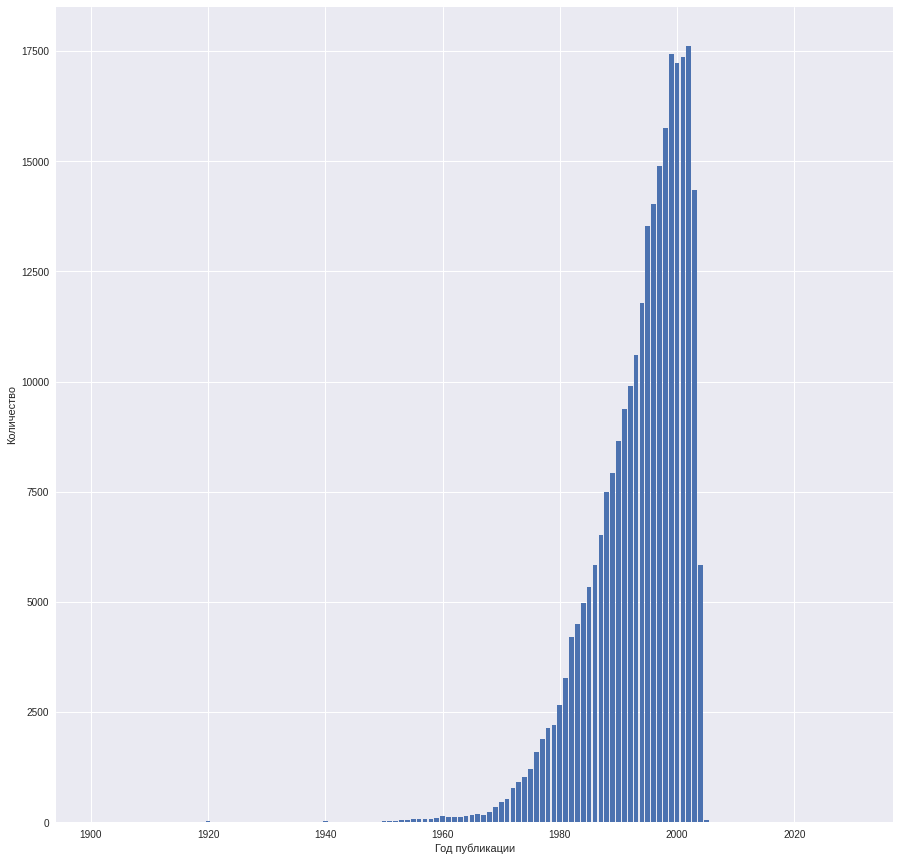

In [42]:
# Посмотрим на распределение - примерно как было с ratings.

yr = books['Year-Of-Publication'].value_counts().sort_index()
yr = yr.where(yr > 5) # Убрать книги, у которых год публикации < 5 - без данного условия график слишком растянут + это выбросы (скорее всего).
plt.figure(figsize=(15, 15))
plt.bar(yr.index, yr.values)
plt.xlabel('Год публикации')
plt.ylabel('Количество')
plt.show()

# Большинство книг довольно современные: позже ~1980.

In [43]:
print(f'Unique books: {books.ISBN.nunique()} | All: {books.ISBN.count()}') # Посмотрим, есть ли дубликаты.

Unique books: 266636 | All: 266636


In [44]:
print(f'Publishers with the most publications:\n{books.Publisher.value_counts()[:10]}') # Посмотрим на самых "многовыпускающих" издательств.

Publishers with the most publications:
Harlequin                   7535
Silhouette                  4220
Pocket                      3870
Ballantine Books            3763
Bantam Books                3640
Scholastic                  3157
Simon &amp; Schuster        2967
Penguin Books               2843
Berkley Publishing Group    2767
Penguin USA                 2715
Name: Publisher, dtype: int64


In [45]:
authors = books['Book-Author'].value_counts()[:10]
print(f'Publishers with the most publications:\n{authors}') # И на самых публикующихся авторов.

# Конечно же Агата Кристи, Шекспир и Кинг.

Publishers with the most publications:
Agatha Christie        598
William Shakespeare    559
Stephen King           511
Ann M. Martin          423
Francine Pascal        372
Carolyn Keene          372
Isaac Asimov           328
Nora Roberts           313
Barbara Cartland       307
Charles Dickens        295
Name: Book-Author, dtype: int64


Из авторов и издательств NaN уже были удалены.

##### 1.0.2 Users часть датасета

In [46]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [47]:
users.dtypes

# Возраст скорее должен быть в целых числах

User-ID       int64
Location     object
Age         float64
dtype: object

In [48]:
users['Age'].unique()

# Есть "пользоватли" младше 10 и старше 100!
# Уберём их как нерелевантные.

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [0]:
users.loc[(users.Age < 10) | (users.Age > 100), 'Age'] = np.nan
users.dropna(inplace=True)

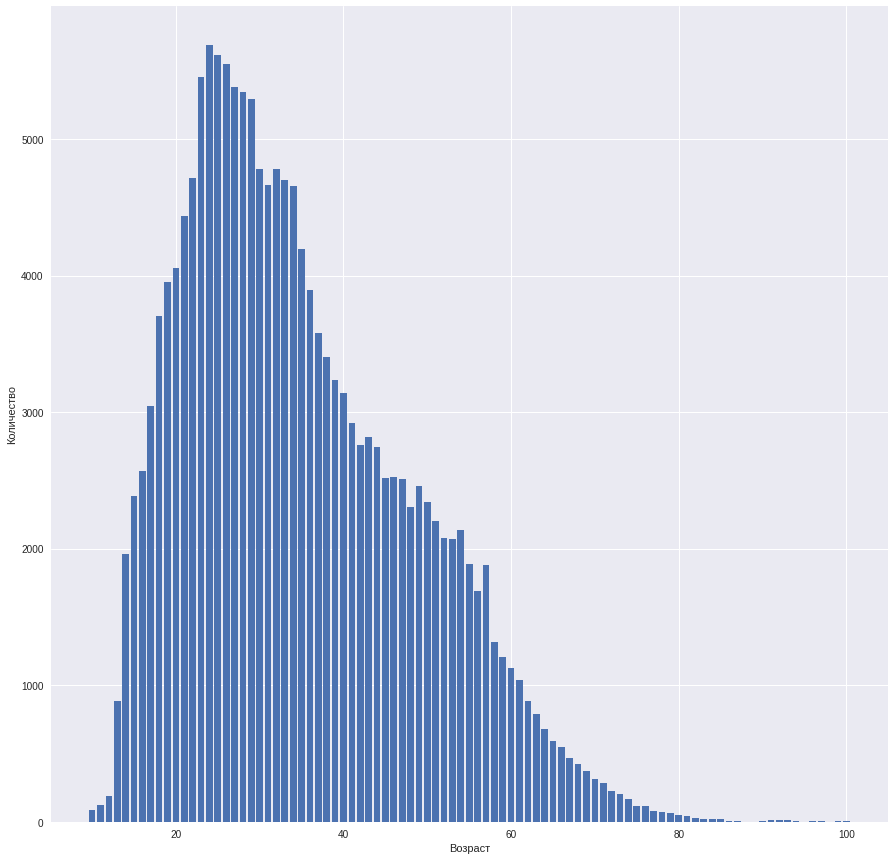

In [50]:
# Посмотрим на распределение возраста.

ag = users['Age'].value_counts().sort_index()
plt.figure(figsize=(15, 15))
plt.bar(ag.index, ag.values)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

# Большинство пользователей - от 20 до 50 лет.

In [51]:
# Нужно как-то преобразовать столбец Location, т.к. в нём сразу всё.

users.Location

# Через запятую идут - город, штат\область\etc и страна -> нужно преобразовать. 

1                  stockton, california, usa
3                  porto, v.n.gaia, portugal
5              santa monica, california, usa
9                 albacete, wisconsin, spain
10            melbourne, victoria, australia
                         ...                
278848           georgetown, ontario, canada
278850                    dallas, texas, usa
278851       brisbane, queensland, australia
278852        stranraer, n/a, united kingdom
278854    tacoma, washington, united kingdom
Name: Location, Length: 166661, dtype: object

In [52]:
locationNew = users['Location'].str.split(',', 2, expand=True) # Разделяем по запятой, 2 - максимум разделений (если вдруг внутри есть запятые) + expand -> преобразуем сразу в датафрейм.

locationNew

,0,1,2
1,stockton,california,usa
3,porto,v.n.gaia,portugal
5,santa monica,california,usa
9,albacete,wisconsin,spain
10,melbourne,victoria,australia
...,...,...,...
278848,georgetown,ontario,canada
278850,dallas,texas,usa
278851,brisbane,queensland,australia
278852,stranraer,n/a,united kingdom


In [0]:
locationNew.columns = ['city', 'county', 'country'] # Назовём их.

users = users.join(locationNew) # Смёржим новую локацию с оригинальным датафреймом.

users.drop(columns=['Location'], inplace=True) # И уберём старую запись.

In [54]:
users.head()

,User-ID,Age,city,county,country
1,2,18.0,stockton,california,usa
3,4,17.0,porto,v.n.gaia,portugal
5,6,61.0,santa monica,california,usa
9,10,26.0,albacete,wisconsin,spain
10,11,14.0,melbourne,victoria,australia


In [55]:
# Посмотрим на самые популярные города и страны.

print(users.city.value_counts()[:15]) # Много из Барселоны, Лондона и Мадрида.

print()

print(users.country.value_counts()[:15]) # Большинство, конечно же, из США.

barcelona    2520
london       2494
madrid       1821
sydney       1493
toronto      1261
melbourne    1141
paris         974
chicago       909
berlin        831
seattle       758
portland      744
new york      714
ottawa        704
vancouver     687
hamburg       626
Name: city, dtype: int64

 usa               75672
 spain             12442
 united kingdom    12249
 canada            11262
 germany           10520
 australia          8740
 italy              5311
 france             2973
 portugal           2620
                    1973
 new zealand        1968
 brazil             1496
 netherlands        1445
 switzerland        1161
 china              1030
Name: country, dtype: int64


In [0]:
users.dropna(inplace=True) # Уберём NaN

#### 1.1 Соединение данных в большой датафрейм

Для начала книги: попробуем соединить их по общему - книги и им соответствующие рейтинги.

In [57]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


In [58]:
ratings.head()

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


Очевидно по уникальному идентификатору - ISBN.

In [59]:
print(len(books))

print(len(ratings))

# Разве что они разные по объёму, но это из-за юзеров, которые могут выставлять оценки нескольким книгам.

266636
433671


In [0]:
# Сольём их в один
books_ratings = books.join(ratings.set_index('ISBN'), on='ISBN')

In [61]:
print(len(books_ratings))

books_ratings.head()

497391


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,NaN,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8.0,5.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676.0,8.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544.0,8.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866.0,9.0


In [62]:
# Посмотрим на данные, которые могли из-за слияния неправильно отобразиться.

print(books_ratings['Book-Title'].isnull().sum())
print(books_ratings['Book-Author'].isnull().sum())
print(books_ratings['User-ID'].isnull().sum())

# Видно, что довольно много не найденных юзеров для книг - почти 25%.

0
0
119586


In [63]:
books_ratings.info() # И, соответственно, оценок тоже нет.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497391 entries, 0 to 271359
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 497391 non-null  object 
 1   Book-Title           497391 non-null  object 
 2   Book-Author          497391 non-null  object 
 3   Year-Of-Publication  497391 non-null  float64
 4   Publisher            497391 non-null  object 
 5   User-ID              377805 non-null  float64
 6   Book-Rating          377805 non-null  float64
dtypes: float64(3), object(4)
memory usage: 30.4+ MB


In [0]:
# От них необходимо избавиться, т.к. нет смысла в строках, которые не содержат ни юзера, ни оценки.

books_ratings.dropna(inplace=True)

In [65]:
books_ratings.info() # Теперь всё в одном размере.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377805 entries, 1 to 271356
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 377805 non-null  object 
 1   Book-Title           377805 non-null  object 
 2   Book-Author          377805 non-null  object 
 3   Year-Of-Publication  377805 non-null  float64
 4   Publisher            377805 non-null  object 
 5   User-ID              377805 non-null  float64
 6   Book-Rating          377805 non-null  float64
dtypes: float64(3), object(4)
memory usage: 23.1+ MB


In [66]:
# Посмотрим на средний рейтинг по книгам - 7 с самыми высокими.

books_ = books_ratings['Book-Title'].value_counts()

books_ = books_[books_ > 40].index # Возьмём только тех, у которых более 40 оценок.

meanRating = books_ratings[books_ratings['Book-Title'].isin(books_)].groupby('Book-Title')['Book-Rating'].mean()
meanRating.sort_values(ascending=False)[:7] # Посмотрим на первые семь.

# Отличные и логичные книги - Толкин, Роулинг, Экзюпери.

Book-Title
The Two Towers (The Lord of the Rings, Part 2)            9.330882
The Return of the King (The Lord of the Rings, Part 3)    9.213592
Harry Potter and the Goblet of Fire (Book 4)              9.125506
The Hobbit                                                9.120000
The Little Prince                                         9.111111
Charlotte's Web (Trophy Newbery)                          9.073529
Harry Potter and the Sorcerer's Stone (Book 1)            9.062500
Name: Book-Rating, dtype: float64

In [67]:
# Посмотрим на средний рейтинг по книгам - 7 с самыми низкими.

meanRating.sort_values()[:7] # Посмотрим на первые семь.

# ¯\_(ツ)_/¯

Book-Title
Wild Animus           4.390706
Four Blondes          5.393939
Isle of Dogs          5.433962
4 Blondes             5.653846
Violin                6.106383
The Little Friend     6.272727
The Sky Is Falling    6.341463
Name: Book-Rating, dtype: float64

Соединим получившийся датафрейм с последним - юзерами.

Тут тоже всё довольно очевидно - по user id.

In [68]:
print(len(books_ratings))

print(len(users))

# Как и в прошлый раз - неодинаковые размеры - из-за юзеров с несколькими выставленными оценками.

377805
166659


In [0]:
data = books_ratings.join(users.set_index('User-ID'), on='User-ID')

In [70]:
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,city,county,country
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8.0,5.0,NaN,NaN,NaN,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676.0,8.0,NaN,NaN,NaN,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544.0,8.0,30.0,toronto,ontario,canada
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866.0,9.0,NaN,NaN,NaN,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,123629.0,9.0,NaN,NaN,NaN,NaN


In [71]:
data.info() # Есть немного (на самом деле не немного) пропущенных значений в столбцах с возрастом и локацией.

# Нам не так сильно важны эти данные - главное, что есть юзеры и рейтинги, которые они выставили.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377805 entries, 1 to 271356
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 377805 non-null  object 
 1   Book-Title           377805 non-null  object 
 2   Book-Author          377805 non-null  object 
 3   Year-Of-Publication  377805 non-null  float64
 4   Publisher            377805 non-null  object 
 5   User-ID              377805 non-null  float64
 6   Book-Rating          377805 non-null  float64
 7   Age                  263008 non-null  float64
 8   city                 263008 non-null  object 
 9   county               263008 non-null  object 
 10  country              263008 non-null  object 
dtypes: float64(4), object(7)
memory usage: 34.6+ MB


### Задание №3 : Разделить данные на тренировочные и валидационные (1/2 балла)

### Задание №4 : Решить задачу на основе предложения всем юзерам наиболее популярных item (1 балл)

### Задание №5 : Решить задачу на основе коллоборативной фильтрации (2 балла)

* Реализовать один из методов коллоборативной фильтрации SVD, SVD++, ALS, ALS with implicit feedback

In [72]:
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,city,county,country
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8.0,5.0,NaN,NaN,NaN,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676.0,8.0,NaN,NaN,NaN,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544.0,8.0,30.0,toronto,ontario,canada
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866.0,9.0,NaN,NaN,NaN,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,123629.0,9.0,NaN,NaN,NaN,NaN


In [73]:
userBookMatrix = data[['User-ID', 'ISBN', 'Book-Rating']]
userBookMatrix.head()

,User-ID,ISBN,Book-Rating
1,8.0,0002005018,5.0
1,11676.0,0002005018,8.0
1,67544.0,0002005018,8.0
1,116866.0,0002005018,9.0
1,123629.0,0002005018,9.0


In [0]:
# Используем другие названия, т.к. surprise.Dataset не дружит с дефисами

userBookMatrix['rating'] = userBookMatrix['Book-Rating']
userBookMatrix['user'] = userBookMatrix['User-ID']
userBookMatrix['item'] = userBookMatrix['ISBN']

In [0]:
from sklearn.model_selection import train_test_split, cross_validate

In [75]:
!pip install surprise

     |████████████████████████████████| 6.5MB 28kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1675372 sha256=d63120d9bf9ac4cf60073cc1ca66588213011665d315da234e8f3d64e61911ba
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
from surprise import Reader, Dataset, NormalPredictor

In [0]:
# First need to create a 'Reader' object to set the scale/limit of the ratings field
reader = Reader(rating_scale=(1, 10))

# Load the data into a 'Dataset' object directly from the pandas df.
# Note: The fields must be in the order: user, item, rating
d = Dataset.load_from_df(userBookMatrix[['user', 'item', 'rating']], reader)

# trainSet = d.build_full_trainset()

In [0]:
from surprise import SVD

In [0]:
svdModel = SVD()

# svdModel.fit(trainSet)

In [101]:
cross_validate(svdModel, d, cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6374  1.6349  1.6310  1.6341  1.6388  1.6352  0.0027  
MAE (testset)     1.2666  1.2610  1.2611  1.2617  1.2618  1.2624  0.0021  
Fit time          20.72   20.82   20.71   20.78   20.63   20.73   0.06    
Test time         0.59    0.58    0.59    0.94    0.59    0.66    0.14    


{'fit_time': (20.72418189048767,
  20.820101737976074,
  20.711297512054443,
  20.7755389213562,
  20.630773067474365),
 'test_mae': array([1.26655361, 1.26097383, 1.2611377 , 1.26171787, 1.26184993]),
 'test_rmse': array([1.63738544, 1.63485561, 1.63100158, 1.63409402, 1.63877873]),
 'test_time': (0.588707447052002,
  0.5824108123779297,
  0.5853180885314941,
  0.9377524852752686,
  0.5883705615997314)}

In [84]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

# Load the movielens-100k dataset
data = Dataset.load_builtin('ml-100k')

# define a cross-validation iterator
kf = KFold(n_splits=3)

algo = SVD()

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
from surprise.model_selection import GridSearchCV

In [0]:
param_grid = {'n_epochs': [15, 20, 25, 30, 35, 40, 45, 50],
'n_factors': [100, 200, 300],
'lr_all': [0.002, 0.003, 0.004, 0.005],
'reg_all': [0.02,0.01,0.05,0.1, 0.4, 0.6]}
svd = GridSearchCV(estimator=SVD, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

svd.fit(trainset)

print("RMSE score", svd.best_score['rmse'])

print("Best Parameters", svd_mf.best_params['rmse'])

### Задание №6 Решить задачу на основе контент-based подхода, выбрав один из методов решения (2 балла):

* На основание векторов с факторизационной матрицы
* При помощи "ембеддингов"  item'ов

### Задание №7 Оценить работу алгоритмов выбрав одну из метрик, сделать вывод по результатам работы (2 балла):

* MAP@k
* NDCG@k
* MRR

In [0]:
!pip install ml_metrics

In [0]:
import ml_metrics

In [0]:
ml_metrics.mapk()

``` Бонус (1 балл) - дополнительные графики и характеристики в EDA и правильно сделанные выводы```

# ```Дедлайн - 6 июня 23:59```